## Import important dependencies and paths

In [1]:
import os 
import numpy as np
import pandas as pd
from utility import *
from clustering import *
from data_preparation import *
from docking import gnina_docking, smina_docking
from rdkit.ML.Cluster import Butina
from rdkit import Chem, DataStructs
from rdkit.Chem import PandasTools, SDMolSupplier, AllChem, rdFingerprintGenerator


#### If there is more than one snapshot of a trajectory, you can give path for all

In [2]:
snapshot_ID = 'A'
protein_file = f"data/{snapshot_ID}/protein_protoss_noligand.pdb"
ref_file = f"data/{snapshot_ID}/ref_ligand.pdb"

### Prepare larger dataset with negative samples with already calculated score.

In [3]:
add_negative_data()

[23:22:26] Explicit valence for atom # 6 C, 5, is greater than permitted
[23:22:26] ERROR: Could not sanitize molecule ending on line 272297
[23:22:26] ERROR: Explicit valence for atom # 6 C, 5, is greater than permitted
[23:22:26] Explicit valence for atom # 4 N, 4, is greater than permitted
[23:22:26] ERROR: Could not sanitize molecule ending on line 285662
[23:22:26] ERROR: Explicit valence for atom # 4 N, 4, is greater than permitted
[23:22:26] Explicit valence for atom # 26 N, 4, is greater than permitted
[23:22:26] ERROR: Could not sanitize molecule ending on line 295105
[23:22:26] ERROR: Explicit valence for atom # 26 N, 4, is greater than permitted
[23:22:26] Explicit valence for atom # 23 N, 4, is greater than permitted
[23:22:26] ERROR: Could not sanitize molecule ending on line 295219
[23:22:26] ERROR: Explicit valence for atom # 23 N, 4, is greater than permitted
[23:22:27] Explicit valence for atom # 8 N, 4, is greater than permitted
[23:22:27] ERROR: Could not sanitize mo

,HIPS code,Lab code,MW,logS,logS @ pH7.4,logD,logP,HBD,HBA,TPSA,Flexibility,Rotatable Bonds,ID,ROMol,score
311,HIPS314,MZ045,245.2,3.451,3.494,2.218,2.018,1,5,74.17,0.1667,3,StarDrop ID 312,<rdkit.Chem.rdchem.Mol object at 0x7f83af200660>,0.493686
337,HIPS341,JHS014,449.4,-0.8367,2.185,2.827,5.787,2,5,69.64,0.2581,8,StarDrop ID 338,<rdkit.Chem.rdchem.Mol object at 0x7f83af20e200>,-0.265965
338,HIPS342,JHS015,415.3,-0.3106,2.281,2.323,5.668,3,5,78.43,0.3704,10,StarDrop ID 339,<rdkit.Chem.rdchem.Mol object at 0x7f83af20e270>,-0.371074
339,HIPS343,JHS017,421.3,-0.3253,2.435,2.421,5.322,3,5,78.43,0.2414,7,StarDrop ID 340,<rdkit.Chem.rdchem.Mol object at 0x7f83af20e2e0>,-0.357913
341,HIPS345,JHS021,435.3,-0.5078,2.529,2.489,5.526,2,5,69.64,0.2333,7,StarDrop ID 342,<rdkit.Chem.rdchem.Mol object at 0x7f83af20e3c0>,-0.550434



### Data preparation
####  1. Protein is prepared with protoss on ProteinPlus server (Done).
####  2. Ligand will be prepared using Gypsum-DL.

In [4]:
# Determine path of data set and run Gypsum-dl
ligand_library = "data/ligands/ecft_scores.sdf"
output = "gypsum_dl_success_cleaned_212.sdf"
prepared_molecules_path = run_gypsumdl(ligand_library, output)


If you use Gypsum-DL in your research, please cite:

Ropp, Patrick J., Jacob O. Spiegel, Jennifer L. Walker, Harrison Green,
Guillermo A. Morales, Katherine A. Milliken, John J. Ringe, and Jacob D. Durrant.
(2019) Gypsum-DL: An Open-source Program for Preparing Small-molecule Libraries for 
Structure-based Virtual Screening. Journal of Cheminformatics 11:1. 
doi:10.1186/s13321-019-0358-3.

    Gypsum-DL-generated variants, we have identified a number of substructures
    that, though technically possible, strike us as improbable or otherwise
    poorly suited for virtual screening. We strongly recommend removing these by
    running Gypsum-DL with the --use_durrant_lab_filters option.

Loading molecules from ecft_scores.sdf...
Desalting all molecules (i.e., keeping only largest fragment).
    Contents of MolContainers
        MolContainer #0 (StarDrop ID 312)
            Mol #0: Nc1nnc(-c2cccc(OC(F)(F)F)c2)o1
        MolContainer #1 (StarDrop ID 338)
            Mol #0: CCN(Cc1ccccc1)

,Molecule,HIPS code,score
1,<rdkit.Chem.rdchem.Mol object at 0x7f83ae821f20>,HIPS314,0.493686
2,<rdkit.Chem.rdchem.Mol object at 0x7f83ae821a50>,HIPS341,-0.265965
3,<rdkit.Chem.rdchem.Mol object at 0x7f83ae821970>,HIPS342,-0.371074
4,<rdkit.Chem.rdchem.Mol object at 0x7f83ae821890>,HIPS343,-0.357913
5,<rdkit.Chem.rdchem.Mol object at 0x7f83ae81bb30>,HIPS345,-0.550434
...,...,...,...
208,<rdkit.Chem.rdchem.Mol object at 0x7f83ae8a75f0>,HIPS7140,0.478913
209,<rdkit.Chem.rdchem.Mol object at 0x7f83ae8a7580>,HIPS7239,0.59379
210,<rdkit.Chem.rdchem.Mol object at 0x7f83ae8a74a0>,HIPS7240,0.442679
211,<rdkit.Chem.rdchem.Mol object at 0x7f83ae8a73c0>,HIPS7241,0.696012


## Docking

## 1. DiffDOCK
### Prepare ligand protein csv file for DiffDock

In [5]:
protein_path = '../../data/A/protein_protoss.pdb'
ligand_path = 'data/ligands/gypsum_dl_success_cleaned_212.sdf'
output_path = 'data/ligands/ligands_protein_complex.csv'
prepare_diffdock_input(protein_path, ligand_path, output_path)

### Run DiffDock (Left to run on cluster)

In [6]:
run_diffdock(protein_path)

NameError: name 'run_diffdock' is not defined

## 2. GNINA 1.0 docking 
### with -cnn crossdock_default2018

#### Run GNINA docking

In [7]:
n_poses = "3"
snapshot_ID = 'A'
sdf_name = 'gnina_ecft_scores_212.sdf'

gnina_docking(snapshot_ID, sdf_name, prepared_molecules, ref_file,  n_poses)

              _             
             (_)            
   __ _ _ __  _ _ __   __ _ 
  / _` | '_ \| | '_ \ / _` |
 | (_| | | | | | | | | (_| |
  \__, |_| |_|_|_| |_|\__,_|
   __/ |                    
  |___/                     

gnina  master:e9cb230+   Built Feb 11 2023.
gnina is based on smina and AutoDock Vina.
Please cite appropriately.

Recommend running with single model (--cnn crossdock_default2018)
or without cnn scoring (--cnn_scoring=none).

Commandline: ./software/gnina -r data/A/protein_protoss_noligand.pdb -l data/ligands/gypsum_dl_success_cleaned_212.sdf.sdf --autobox_ligand data/A/ref_ligand.pdb -o data/A/gnina_ecft_scores_212.sdf --seed 1637317264 --exhaustiveness 8 --num_modes 3 --cnn_scoring rescore --cnn crossdock_default2018 --no_gpu --log data/log.txt
Using random seed: 1637317264

0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
***************************************************


In [ ]:
gnina_results_path = f'data/{snapshot_ID}/{sdf_name}'
rank_correlation(gnina_results_path)

NameError: name 'gnina_results_path' is not defined

### SMINA docking

#### Run SMINA docking --cnn_scoring=none

In [1]:
n_poses = "3"
snapshot_ID = 'A'
sdf_name = 'smina_ecft_scores_212.sdf'

smina_docking(snapshot_ID, sdf_name, prepared_molecules, ref_file,  n_poses)

NameError: name 'smina_docking' is not defined

             true rank  docked rank
true rank     1.000000     0.301236
docked rank   0.301236     1.000000
0.3012360519126462


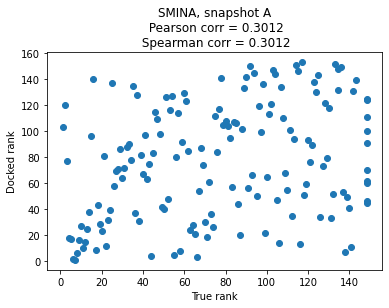

0.3239935150286321
                   Activity  minimizedAffinity
Activity           1.000000           0.323994
minimizedAffinity  0.323994           1.000000


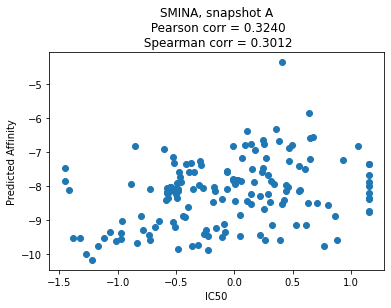

In [ ]:
smina_results_path = f'data/{snapshot_ID}/{sdf_name}'
rank_correlation(smina_results_path)

### FP generating and clustering based on Tanimoto similarity metric for larger data

In [ ]:
# Add column with Morgan fingerprint
docked_df = PandasTools.LoadSDF(smina_results_path, idName='ID', molColName='Molecule', strictParsing=False)
docked_df['MorganFP'] = docked_df.Molecule.apply(morgan_fp_generator)
docked_df.head()

,Activity,minimizedAffinity,ID,Molecule,MorganFP
0,0.323222,-9.14152,HIPS7112,<rdkit.Chem.rdchem.Mol object at 0x7f499642ec10>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,0.323222,-8.84115,HIPS7112,<rdkit.Chem.rdchem.Mol object at 0x7f499642e430>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,0.323222,-8.63359,HIPS7112,<rdkit.Chem.rdchem.Mol object at 0x7f499642e2e0>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,1.059752,-6.83110,HIPS7114,<rdkit.Chem.rdchem.Mol object at 0x7f499642e580>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,1.059752,-6.71633,HIPS7114,<rdkit.Chem.rdchem.Mol object at 0x7f499642e6d0>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


#### Generate tanimoto similarity matrix

In [ ]:
tanimoto_matrix = tanimoto_distance_matrix((docked_df.MorganFP.to_list()))

NameError: name 'DataStructs' is not defined

#### Choice of butina clustering cutoff 
**Inspired by T05 teachOpenCADD Talktorial**

### Choice of cutoff.
#### Choose the cutoff that has clusters equal or bigger than used data.

In [ ]:
cutoff = choice_of_cutoff(docked_df)

NameError: name 'np' is not defined

In [ ]:
#Save cluster centers as SDF
# cutoff is chosen to be 0.1 which has 88 clusters
cutoff = 0.1

butina_clusters = butina_clustering(docked_df.MorganFP.to_list(), cutoff=cutoff)

cluster_centers_ind = [c[0] for c in butina_clusters]
cluster_centers_df = docked_df[docked_df.index.isin(cluster_centers_ind)]
display(cluster_centers_df.sort_values('minimizedAffinity'))
cluster_path = 'data/ligands/clustered_poses_212.sdf'

PandasTools.WriteSDF(cluster_centers_df, cluster_path,idName="ID", molColName='Molecule', properties=cluster_centers_df.columns)

NameError: name 'DataStructs' is not defined

             true rank  docked rank
true rank     1.000000     0.398178
docked rank   0.398178     1.000000
0.3981781376518219


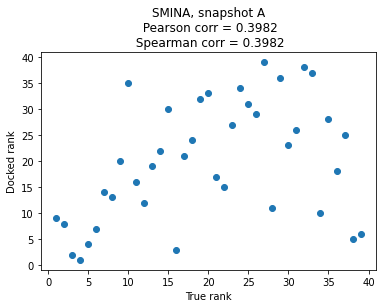

0.3715234439371934
                   Activity  minimizedAffinity
Activity           1.000000           0.371523
minimizedAffinity  0.371523           1.000000


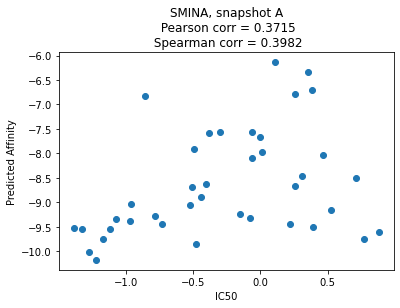

In [ ]:
cluster_path = 'data/ligands/clustered_poses_212.sdf'

rank_correlation(cluster_path)

### Rescoring

#### RFscoringVS for SMINA docked poses

Traceback (most recent call last):
  File "rf-score-vs", line 106, in <module>
IOError: File does not exist: 'data/A/ecft_scores_alldata213.sdf'
Failed to execute script rf-score-vs


             true rank  docked rank
true rank     1.000000     0.228529
docked rank   0.228529     1.000000
0.2285286212821704


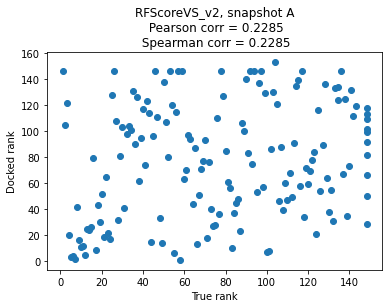

-0.324311976265433
              Activity  RFScoreVS_v2
Activity      1.000000     -0.324312
RFScoreVS_v2 -0.324312      1.000000


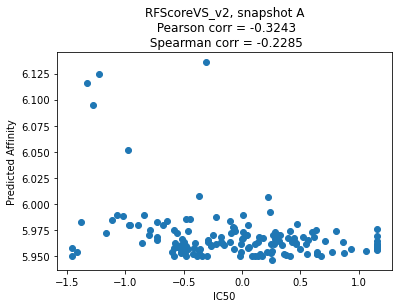

In [ ]:
results_path = "data/A/smina_rfscorevs_results_212.sdf"
rfscore_cmd = f'./software/rf-score-vs --receptor {protein_file} data/A/ecft_scores_alldata213.sdf -o sdf -O {results_path} -n 1'

if 'smina_rfscorevs_results_alldata.sdf' not in os.listdir(f'data/{snapshot_ID}/'):
    os.system(rfscore_cmd)
else:
    print("It's already reascored")

rank_correlation(results_path)

             true rank  docked rank
true rank     1.000000     0.600607
docked rank   0.600607     1.000000
0.6006072874493928


,Activity,minimizedAffinity,MorganFP,RFScoreVS_v2,ID,Molecule,docked rank,true rank
11,0.255042,-6.78148,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,5.946099,HIPS5993,<rdkit.Chem.rdchem.Mol object at 0x7f21ddbbbd60>,39.0,29.0
33,0.380265,-6.34541,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,5.950435,HIPS6839,<rdkit.Chem.rdchem.Mol object at 0x7f21e58985f0>,38.0,33.0
20,0.108263,-6.13712,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,5.950544,HIPS6568,<rdkit.Chem.rdchem.Mol object at 0x7f21ddbbb900>,37.0,27.0
5,-0.300895,-7.57150,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,5.951175,HIPS451,<rdkit.Chem.rdchem.Mol object at 0x7f21ddb37b30>,36.0,20.0
23,0.357160,-6.18088,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,5.951748,HIPS6789,<rdkit.Chem.rdchem.Mol object at 0x7f21ddbbbcf0>,35.0,32.0


,Activity,minimizedAffinity,MorganFP,RFScoreVS_v2,ID,Molecule,docked rank,true rank
55,-0.442309,-8.76947,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,5.990720,HIPS6986,<rdkit.Chem.rdchem.Mol object at 0x7f21dde81270>,5.0,17.0
8,0.008470,-7.96128,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,5.994400,HIPS5024,<rdkit.Chem.rdchem.Mol object at 0x7f21ddb37740>,4.0,26.0
57,-1.273758,-9.88434,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,6.095042,HIPS6989,<rdkit.Chem.rdchem.Mol object at 0x7f21dde81430>,3.0,3.0
77,-1.326906,-9.52587,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,6.116211,HIPS7002,<rdkit.Chem.rdchem.Mol object at 0x7f21dde81200>,2.0,2.0
72,-1.222361,-10.17618,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,6.221700,HIPS7000,<rdkit.Chem.rdchem.Mol object at 0x7f21dde810b0>,1.0,4.0


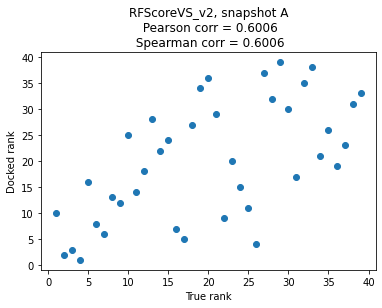

-0.5232069119374513
              Activity  RFScoreVS_v2
Activity      1.000000     -0.523207
RFScoreVS_v2 -0.523207      1.000000


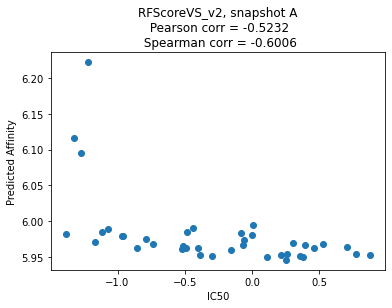

In [ ]:
cluster_results_path = "data/A/cluster_rfscorevs_results_212.sdf"
rfscore_cmd = f'./software/rf-score-vs --receptor {protein_file} data/ligands/clustered_poses_212.sdf -o sdf -O {cluster_results_path} -n 1'

if 'cluster_rfscorevs_results_212.sdf' not in os.listdir(f'data/{snapshot_ID}/'):
    os.system(rfscore_cmd)
else:
    print("It's already reascored")

rank_correlation(cluster_results_path)

#### oddt scoring (Not needed)


In [ ]:
# #Convert pdb to mol2
# protein_file_mol2 = "data/A/protein_protoss_noligand.mol2"
# protein_file = "data/A/protein_protoss_noligand.pdb"
# if "protein_protoss_noligand.mol2" not in os.listdir('data/A'):
#     os.system(f'obabel {protein_file} -O {protein_file_mol2}')
# else:
#     print("The protein is already converted.")

The protein is already converted


In [ ]:
# oddt_cmd = f'oddt_cli data/ligands/gypsum_dl_success_cleaned.sdf --receptor {protein_file_mol2} --score rfscore_v2 -O data/A/docked_ligands_rescored.sdf'
# os.system(oddt_cmd)

### Test DockM8

In [ ]:
from scipy.stats import spearmanr


def compare_rank(df1, df2):

    df2.drop_duplicates(subset='ID', inplace=True)
    df1 = df1[df1['ID'].isin(df2['ID'])]
    df1['old rank'] = df1['Activity'].apply(pd.to_numeric).rank()

    # df2.set_index('ID',inplace=True)
    df2.index = df2.index + 1
    # display(df2.index)
    
    df2['new rank'] = range(1, df2.shape[0]+1)
    df1.sort_values('ID', inplace=True)
    df2.sort_values('ID', inplace=True)
    display(df1)
    display(df2)
    index1 = df1.index
    index2 = df2.index

# Calculate the correlation between the two indices
    correlation = index1.to_series().corr(index2.to_series())
    print(correlation)
    rank_corr = df1['old rank'].corr(df2['new rank'])
    rho = spearmanr(df1['old rank'], df2['new rank'])[0]
    print(rho)
    plt.scatter(df1['old rank'], df2['new rank'])
    print(rank_corr)
    plt.xlabel('True rank')
    plt.ylabel('Docked rank')
    plt.title(f'DockM8 bestpose SMINA \n Pearson corr = {rank_corr:.4f}\n Spearman corr = {rho:.4f}')
    plt.show()
    print('\n\n')
    

path = os.getcwd()+'/data/firstpose_47mol/temp/ranking/'
true_df = PandasTools.LoadSDF('data/ligands/IC50_mol_only.sdf', idName="ID")[['ID', 'Activity']]
true_df['old rank'] = true_df['Activity'].apply(pd.to_numeric).rank()


for f in os.listdir(path):
    print(f)
    compare_rank(true_df, pd.read_csv(path+f))
    # break
    display(pd.read_csv(path+f))

NameError: name 'os' is not defined